## Игры: выявление закономерностей

**Цель исследования:** определить, какие факторы влияют на успешность игры.

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (до 2016 года). Необходимо выявить определяющие успешность игры закономерности в предположении, что заказчик планирует продвижение и рекламную кампанию на 2017 год. 

Для анализа доступны данные компьютерных играх, выпущенных до декабря 2016 года:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board)

**План работы:**
1. Знакомство с данными
2. Предобработка данных
3. Обзор платформ, влияние на продажи
4. Влияние оценок пользователей и критиков
5. Обзор жанров, продажи по жанрам
6. Портреты пользователей по регионам
7. Рейтинг ESRB, влияние на продажи
8. Проверка гипотез

### Знакомство с данными

In [2]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from matplotlib import cm
import seaborn as sns

In [3]:
#откроем файл с данными

try:
    games = pd.read_csv('datasets/games.csv')
except FileNotFoundError:
    games = pd.read_csv('/datasets/games.csv')     

games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Количество уникальных значений - бросается в глаза то, что уникальных названий игр меньше, чем строк в датасете:

In [5]:
games.nunique()

Name               11559
Platform              31
Year_of_Release       37
Genre                 12
NA_sales             402
EU_sales             307
JP_sales             244
Other_sales          155
Critic_Score          82
User_Score            96
Rating                 8
dtype: int64

Проверим количество полных дубликатов

In [6]:
games.duplicated().sum()

0

Игры с одними и теми же названиями нередко выпускают для разных платформ, проверим дубликаты по связке "имя-платформа-год" - обнаружим дважды повторяющуюся строку с отсутствием имени и неполный дубликат одной из игр.

In [7]:
games[games.duplicated(subset=['Name','Platform', 'Year_of_Release'], keep=False)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Просмотрим значения некоторых колонок на предмет неожиданных значений и скрытых дубликатов:

In [8]:
print(sorted(games['Platform'].unique()))

['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']


In [9]:
print(sorted(games['Year_of_Release'].unique()))

[1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, nan]


In [10]:
print(games['Genre'].unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


In [11]:
print(games['Rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Выведем также значения колонки "user_score", чтобы понять, что кроме nan она сожержит; посчитаем число этих значений.

In [12]:
print('Уникальные значения:', games['User_Score'].unique())
games[games['User_Score'] == 'tbd']['User_Score'].value_counts()

Уникальные значения: ['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


tbd    2424
Name: User_Score, dtype: int64

**Обзор данных - выводы:**


Доступны 16715 записей об играх в 12 различных жанрах, выпущенных на 31 платформе с 1980 по 2016 год. Встречаются повторения в названиях игр, не являющиеся смысловыми дубликатами. Пропуски присутствуют в столбцах с именем, годом, жанром, оценками пользователей и критиков, а также рейтингом. Некоторые столбцы требуют изменения типа данных, переименования и обработки пропусков. 

### Предобработка данных

Приведем названия всех колонок к нижнему регистру, удалим две строки с пропусками в именах их жанрах игр, а также дубликат строки с игрой Madden NFL 13

In [13]:
games.columns = map(str.lower, games.columns)

In [14]:
games.drop(index=[659, 14244, 16230], inplace=True)

Одним из ключевых параметров анализа является год релиза игр, посчитаем долю строк с пропусками в столбце year_of_release

In [15]:
print('Доля строк с пропущенным годом релиза', (1-(games['year_of_release'].count()/len(games))))

Доля строк с пропущенным годом релиза 0.0160962182862614


Пропуски в данных о годе релиза занимают меньше 2% датасета. Удалим их, сбросим индексы и сменим тип данных года на int.


In [16]:
games.dropna(subset=['year_of_release'], inplace=True)
games = games.reset_index(drop=True)
games['year_of_release'] = games['year_of_release'].astype('int64')

В столбце с оценками пользователей встречается значение tbd - to be determined, по сути оно означает, что данные отсутствуют,
но могут быть внесены позже. В нашем случае это аналогично пропуску - поэтому заменим все tbd на nan. Также зменим тип данных.
Пропущенные значения в числовом столбце обрабатывать не будем - попытки экстраполировать содержимое пропущенных столбцов не дадут новой информации и могут исказить имеющуюся.

In [17]:
games['user_score'] = games['user_score'].replace('tbd', np.nan).astype('float');

В столбце с рейтингом данные строковые, поэтому для удобства дальнейшей работы заполним пропуски значением Undefined.
Изменим смешанные типы данных на str.

In [18]:
games['rating'].fillna('Undefined', inplace=True)
games['rating'] = games['rating'].astype(str)

In [19]:
games['genre'] = games['genre'].astype(str)

In [20]:
#проверка

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Добавим столбец с суммарными продажами.

In [21]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [22]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Undefined,31.38


**Предобработка данных - выводы:**


- названия столбцов приведены к нижнему регистру
- удалены строки с пропусками, касающимися года релиза
- типы данных для некоторых столбцов изменены на более удобные для работы
- удалены значения tbd в столбце с пользовательским рейтингом; значения nan заменены на Undefined в столбце с возрастным рейтингом
- добавлен столбец с общей суммой продаж

## Исследовательский анализ данных

### Обзор платформ, их влияние на продажи

Анализ датасета начнём с обзора платформ, чтобы выделить наиболее актуальные платформы для дальнейшего рассмотрения.

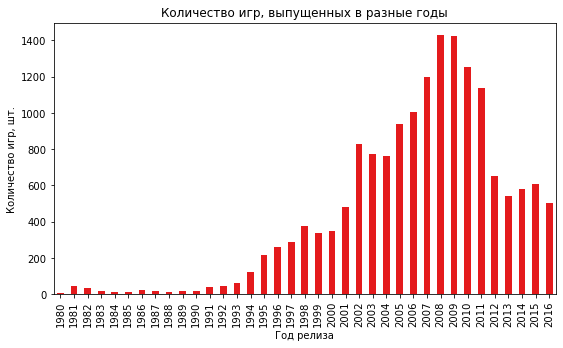

In [23]:
#для начала выведем, сколько всего игр выпускалось в разные годы

cmap = cm.get_cmap('Set1')
games.groupby('year_of_release')['year_of_release'].count().plot(kind='bar', colormap=cmap, figsize=(9, 5));
plt.xlabel('Год релиза')
plt.ylabel('Количество игр, шт.')
plt.title('Количество игр, выпущенных в разные годы', fontsize=12)
plt.show()

Рост рынка игр начался в начале 90х годов и достиг пика в 2008-2009 годах: в эти два года было выпущено самое большое количество игр. Затем тренд пошел на спад - после небольшого оживления в 2014-2015 гг, 2016й стал самым "низкоурожайным" с 2001 года.

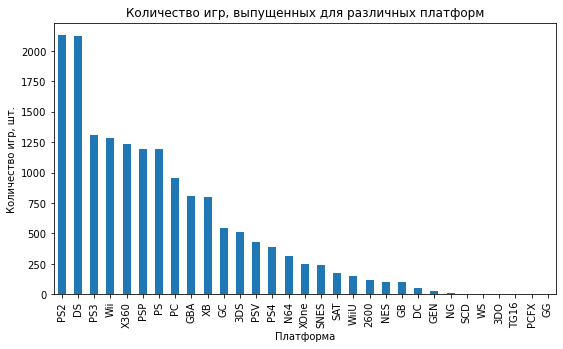

In [24]:
#выведем рейтинг платформ по числу выпущенных для них игр

games.groupby('platform')['name'].count().sort_values(ascending=False).plot(kind='bar', figsize=(9, 5));
plt.title('Количество игр, выпущенных для различных платформ', fontsize=12)
plt.xlabel('Платформа')
plt.ylabel('Количество игр, шт.')
plt.show()

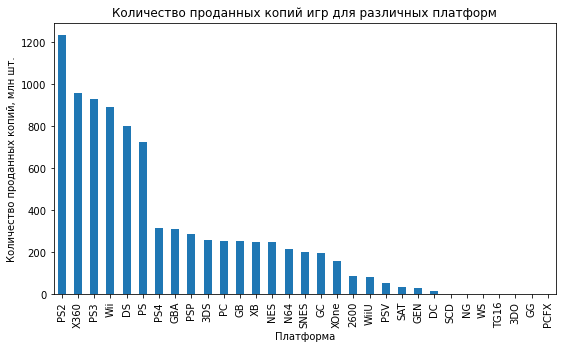

In [25]:
#построим рейтинг платформ по количеству проданных копий игр

games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(9, 5));
plt.title('Количество проданных копий игр для различных платформ', fontsize=12)
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн шт.')
plt.show()

В обоих случаях лидирует PlayStation2 (которая является самой популярной за всю историю консолью). Интересно, что для Nintendo DS игр было разработано больше в сравнении с другими платформами, а копий продано меньше. А у X360 - наоборот.</br>
Рассмотрим наиболее популярные (по проданным копиям) платформы.

In [26]:
#отберем платформы, для которых было продано более 400 млн. копий

first_level_platforms = (
    games.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .query('total_sales > 400')
    .sort_values('total_sales')
    .index
    .to_list()
)
print('Наиболее популярные платформы (более 400 млн. проданных копий:)', first_level_platforms)

Наиболее популярные платформы (более 400 млн. проданных копий:) ['PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2']


Рассмотрим срез с наиболее популярными платформами, скомпоновав продажи по годам для каждой из них, пропуски заполним нулями.

In [27]:
first_level_platforms_table = (
    games.query('platform == @first_level_platforms').
    pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .fillna(0)
)

display(first_level_platforms_table.head(10))

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,0.00,0.00,0.0,0.0,0.0
1994,0.00,6.03,0.00,0.0,0.0,0.0
1995,0.00,35.96,0.00,0.0,0.0,0.0
1996,0.00,94.70,0.00,0.0,0.0,0.0
1997,0.00,136.17,0.00,0.0,0.0,0.0
1998,0.00,169.49,0.00,0.0,0.0,0.0
1999,0.00,144.53,0.00,0.0,0.0,0.0
2000,0.00,96.37,39.17,0.0,0.0,0.0
2001,0.00,35.59,166.43,0.0,0.0,0.0


Выведем "жизненный цикл" каждой платформы на экран.

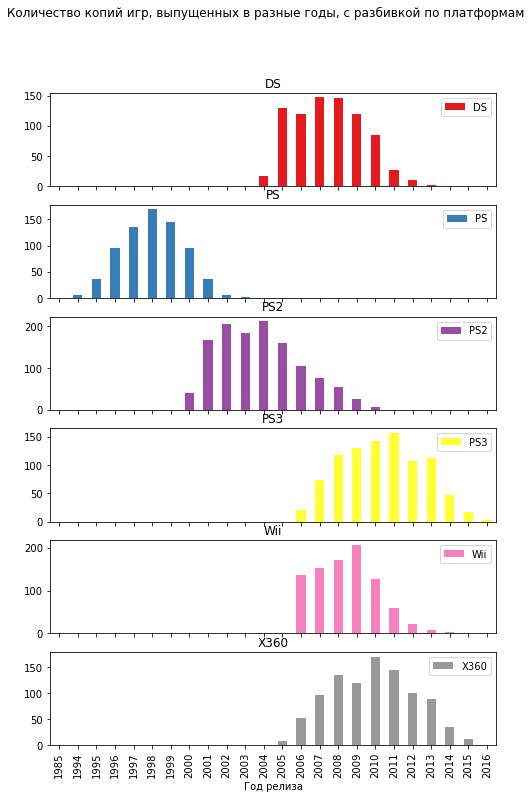

In [29]:
first_level_platforms_table.plot(kind='bar', subplots=True, figsize=(8, 12), colormap=cmap);
plt.suptitle('Количество копий игр, выпущенных в разные годы, с разбивкой по платформам', fontsize=12)
plt.xlabel('Год релиза')
plt.show()

Для наглядности построим график по распределению со всеми платформами на одном графике после 1995 года.

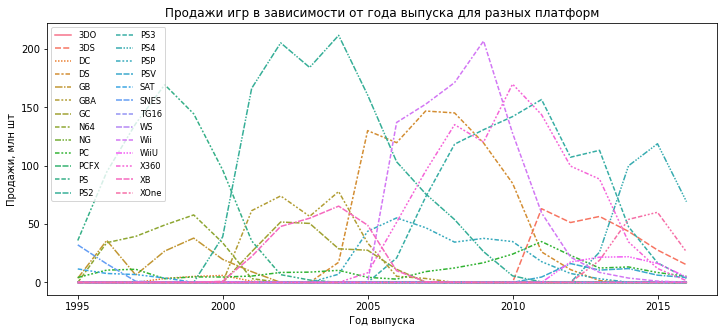

In [31]:
first_level_platforms_table2 = (
    games.query('year_of_release >= 1995')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .fillna(0)
)
#display(first_level_platforms_table2)
line,ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(data=first_level_platforms_table2);
ax.set_title('Продажи игр в зависимости от года выпуска для разных платформ')
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Продажи, млн шт')
ax.legend(loc='upper left', fontsize='small', ncol=2);

Повторим ту же операцию для количества выпущенных для каждой платформы игр.

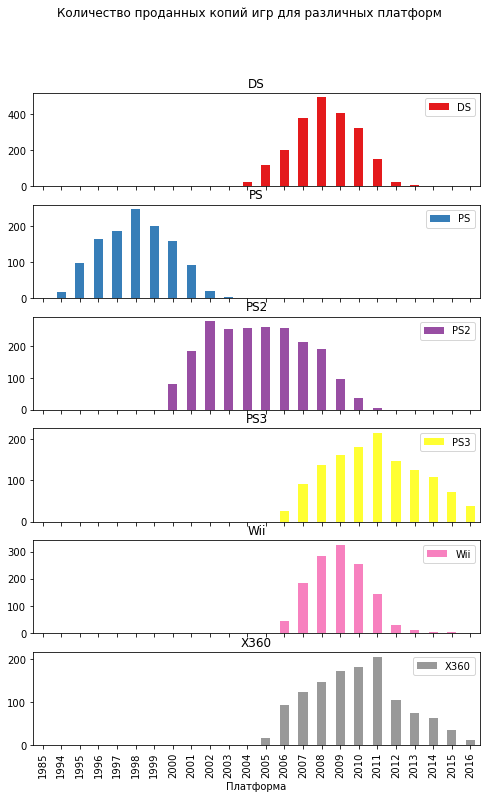

In [32]:
first_level_platforms_table2 = (
    games.query('platform == @first_level_platforms').
    pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count')
    .fillna(0)
)

first_level_platforms_table2.plot(kind='bar', subplots=True, figsize=(8, 12), colormap=cmap);
plt.suptitle('Количество проданных копий игр для различных платформ', fontsize=12)
plt.xlabel('Платформа')
plt.show()

Хорошо видно, что характерный жизненный цикл каждой платформы - когда игры для нее создаются и продаются - составляет около 11 лет от появления до полного ухода с рынка. Пик продаж приходится на игры, выпущенные в его середине - на 5-6 год существования платформы. Стоит обратить внимание, что для PS2 после прохождения пика и появления следующего поколения платформы (PS3), продолжало выходить большое количество игр - но продажи продолжали падать.</br>
Таким образом, данные 11-ти и более летней давности бесполезны для анализа - железо, а вместе с ним и поколение игр сменилось, сменился характер поведения игроков, их подход к выбору, оценки итд.</br>
Для дальнейшего анализа возьмем данные с 2014го года: трех лет достаточно для отслеживания тенденций, а также в 2013м году на рынок вышло 8е поколение консолей - PS4 и XboxOne и с 2014го года они полноценно играют на рынке.

In [33]:
#в отдельную переменную отберем данные за 2014-2016 годы, выведем актуальные платформы

actual_games_data_2014 = games.loc[games['year_of_release'] >= 2014]
print(sorted(actual_games_data_2014['platform'].unique()))

['3DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']


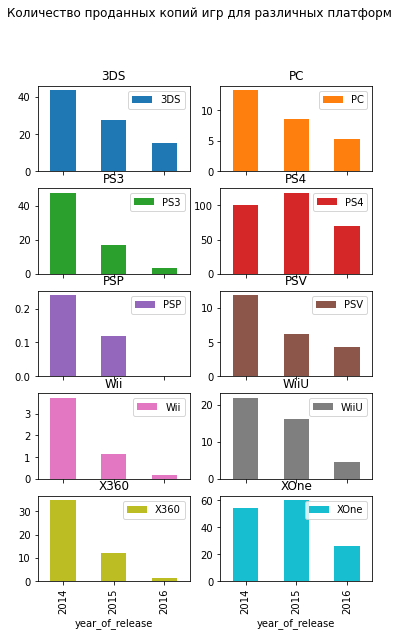

In [34]:
#сделаем сводную таблицу общих продаж по платформам в зависимости от года в периоде с 2014 года, выведем на экран

actual_games_data_platforms = actual_games_data_2014.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
actual_games_data_platforms.plot(kind='bar', subplots=True, figsize=(6, 11), layout=(6, 2)); 
plt.suptitle('Количество проданных копий игр для различных платформ', fontsize=12)
plt.show()

На этих графиках мы видим рост год на год с 2014 к 2015 у двух платформ - PS4 и XOne. Все остальные с 2014 к 2015 снизились. Отдельно стоит рассмотреть PC - это, пожалуй, единственная платформа, не являющаяся полностью игровой и потому живущая по другим законам.

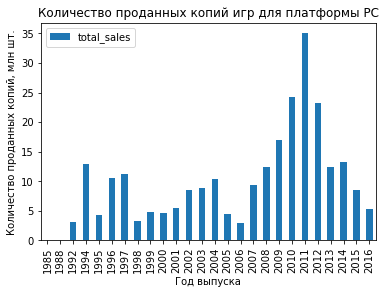

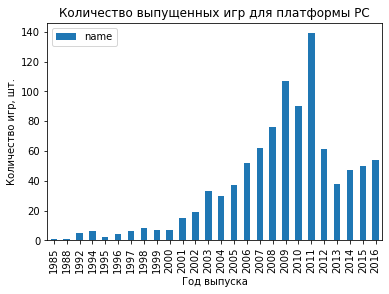

In [35]:
#построим графики продаж и выпущенных игр для PC для всего датасета

games.query('platform == "PC" ').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar');
plt.title('Количество проданных копий игр для платформы PC', fontsize=12)
plt.xlabel('Год выпуска')
plt.ylabel('Количество проданных копий, млн шт.')
plt.show()

games.query('platform == "PC" ').pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar');
plt.title('Количество выпущенных игр для платформы PC', fontsize=12)
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр, шт.')
plt.show()

Платформа PC - единственная, существующая с 80х годов и до нынешнего времени. В какой-то мере, сравнение с консолями не совсем верно - ведь персональные компьютеры тоже прошли несколько смен поколений процессоров, а игры для PC существенно эволюционировали с 1985 года.</br>
На графике продаж игр можно выделить несколько пиков, которые, вероятно, связаны с выходом новых поколений процессоров и видеокарт. Количество выпущенных игр для PC достигло пика в 2011 году, в 2013 сократилось более, чем в 4 раза (вероятно, сказывается развитие мобильных игр и выход восьмого поколения консолей) и плавно растёт третий год подряд (возможно, благодаря активному развитию кибер-спорта).

Для дальнейшего рассмотрения выберем две основные консоли - PS4 и XOne, дополнительную WiiU, а также PC.

In [36]:
platform_list = ['PS4', 'XOne', 'WiiU', 'PC']

In [37]:
#выведем на экран количество игр, выпущенных для этих трех платформ

(
    actual_games_data_2014
    .query('platform in @platform_list')
    .pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count')
    .fillna(0)
    .astype('int64')
)

year_of_release,2014,2015,2016
platform,,,
PC,47,50,54
PS4,75,137,164
WiiU,31,28,14
XOne,61,80,87


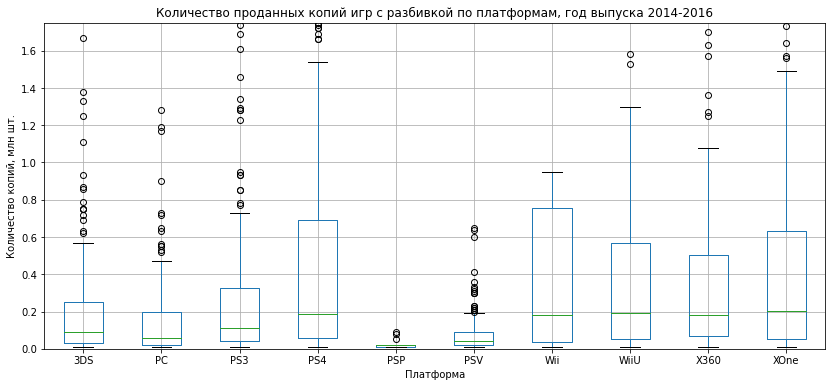

In [39]:
#построим ящики с усами для продажам игр для каждой платформы

actual_games_data_2014.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum').boxplot(figsize=(14, 6));
plt.ylim(0, 1.75);
plt.title('Количество проданных копий игр с разбивкой по платформам, год выпуска 2014-2016', fontsize=12)
plt.xlabel('Платформа')
plt.ylabel('Количество копий, млн шт.')
plt.show()

Распределения величин заметно скошены вправо - на каждой платформе продажи большинства игр не превышают 2-3 млн. копий, но у каждой платформы есть "выбросы" - наиболее успешные и популярные игры, продающиеся в 2-3-4-10 раз лучше, чем основная масса. Особенно наглядно это видно у "состоявшихся" платформ PS3, X360 и Wii - есть несколько игр, продажи которых перевалили за 20 млн. копий. </br>
Самые большие продажи за последние 3 года у платформ PS4, XOne и Wii (несмотря на то, что эта платформа "более ранняя" чем WiiU - т.е. Wii оказалась более удачной, чем ее переемница).

Для магазина игр логично иметь в продаже топ-10, топ-5 или хотя бы топ-3 игр для развивающихся платформ (топ-10 для PS4, XOne, PC вывкден ниже).

In [40]:
#выведем топ-10 игр для выбранных платформ

for element in platform_list:
    print('Топ-10 игр для платформы', element)
    print()
    my_lst = actual_games_data_2014.query('platform == @element').sort_values('total_sales', ascending=False).groupby('platform')['name'].head(10).to_list()
    print(*my_lst, sep='\n')
    print('-------------------------')
    

Топ-10 игр для платформы PS4

Call of Duty: Black Ops 3
Grand Theft Auto V
FIFA 16
Star Wars Battlefront (2015)
Call of Duty: Advanced Warfare
FIFA 17
Fallout 4
FIFA 15
Destiny
Uncharted 4: A Thief's End
-------------------------
Топ-10 игр для платформы XOne

Call of Duty: Black Ops 3
Grand Theft Auto V
Call of Duty: Advanced Warfare
Halo 5: Guardians
Fallout 4
Star Wars Battlefront (2015)
Assassin's Creed: Unity
Destiny
Gears of War: Ultimate Edition
FIFA 16
-------------------------
Топ-10 игр для платформы WiiU

Mario Kart 8
Super Smash Bros. for Wii U and 3DS
Splatoon
Super Mario Maker
Mario Party 10
Donkey Kong Country: Tropical Freeze
Yoshi's Woolly World
Hyrule Warriors
Captain Toad: Treasure Tracker
The Legend of Zelda: Twilight Princess HD
-------------------------
Топ-10 игр для платформы PC

The Sims 4
Fallout 4
Farming Simulator 2015
Grand Theft Auto V
The Elder Scrolls Online
Dragon Age: Inquisition
The Witcher 3: Wild Hunt
Farming Simulator 17
Far Cry 4
Titanfall
-------

**Обзор платформ - вывод:**

Большинство платформ имеют характерный жизненный цикл длинной в 11 лет (за исключением PC). Распределение продаж для каждой платформы заметно скошено вправо за счёт популярных игр, продающихся миллионами копий. 
Для дальшейшего анализа были выбраны периоды 8 лет и 3 года и 4 платформы - PS4, XOne, WiiU и PC. Был сформирован топ-10 игр с лучшими продажами.

### Влияние оценок пользователей и критиков

In [42]:
#для начала выведем статистику для всех оценок 

actual_games_data_2014[['user_score', 'critic_score']].describe()

,user_score,critic_score
count,888.000000,718.000000
mean,6.623536,72.306407
std,1.589792,12.213500
min,0.200000,19.000000
25%,5.800000,66.000000
50%,7.000000,74.000000
75%,7.800000,81.000000
max,9.300000,97.000000


Видим, что и пользователи, и критики довольно лояльны - половина игр оценивается в 7.0 и 74 балла соответственно, среднее - 6.6 и 72.3 баллов. По оценкам можно сказать, что пользователи чуть более критичны - среднее, медиана, минимальная и максимальная оценки ниже, чем в стане критиков.</br>

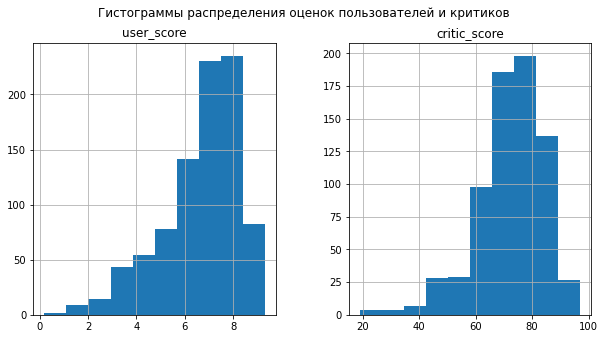

In [43]:
#выведем гистограммы распределений оценок

actual_games_data_2014[['user_score', 'critic_score']].hist(bins = 10, figsize=(10, 5));
plt.suptitle('Гистограммы распределения оценок пользователей и критиков', fontsize=12)
#ax1.set_title('Оценки пользователей', fontsize=10)
#plt.xlabel('Оценка')
#plt.ylabel('Плотность распределения')
#plt.title('Оценки критиков', fontsize=10)
#plt.xlabel('Оценка')
#plt.ylabel('Плотность распределения')
plt.show()

Посмотрим коэффициент корреляции между оценками и продажами для одной их наиболее популярных платформ - PS3.

In [46]:
games.query('platform == "PS3"')[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.632847,0.433712
user_score,0.632847,1.000000,0.127926
total_sales,0.433712,0.127926,1.000000


Для платформы PS3 предположение о наличии корреляции между оценками пользователей и продажами оказалось неверным - она близка к нулю. В случае с оценками критиков есть положительная корреляция на уровне 0,43. Посмотрим, как это выглядит на графике рассеяния.

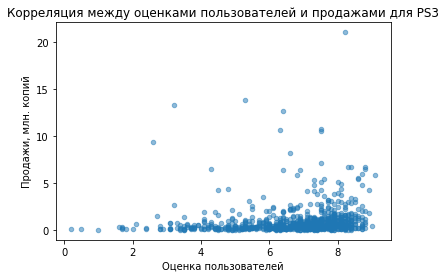

In [47]:
#график рассеяния для оценок пользователей
games.query('platform == "PS3"').plot.scatter(x='user_score', y='total_sales', alpha=0.5);
plt.title('Корреляция между оценками пользователей и продажами для PS3', fontsize=12)
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, млн. копий')
plt.show()

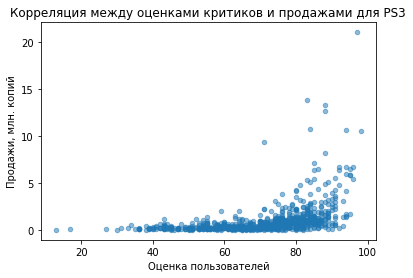

In [48]:
#график рассеяния для оценок критиков
games.query('platform == "PS3"').plot.scatter(x='critic_score', y='total_sales', alpha=0.5);
plt.title('Корреляция между оценками критиков и продажами для PS3', fontsize=12)
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, млн. копий')
plt.show()

Попробуем убрать "выбросы", представленные продажами самых популярных игр и посмотрим, как поменяются коэффициенты корреляции и графики рассеяния.

,critic_score,user_score,total_sales
critic_score,1.000000,0.645888,0.537529
user_score,0.645888,1.000000,0.273925
total_sales,0.537529,0.273925,1.000000


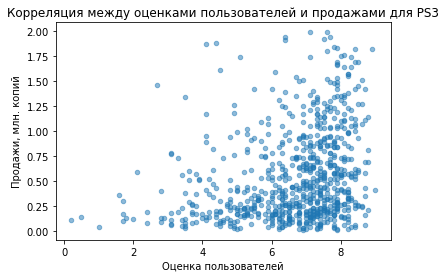

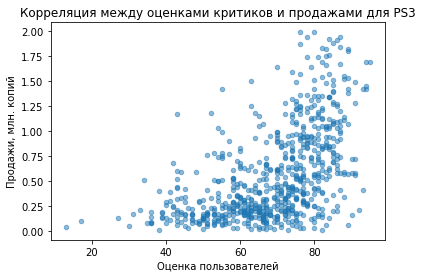

In [49]:
display(games.query('platform == "PS3" and total_sales < 2.0')[['critic_score', 'user_score', 'total_sales']].corr())
games.query('platform == "PS3" and total_sales < 2.0').plot.scatter(x='user_score', y='total_sales', alpha=0.5);
plt.title('Корреляция между оценками пользователей и продажами для PS3', fontsize=12)
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, млн. копий')
plt.show()
games.query('platform == "PS3" and total_sales < 2.0').plot.scatter(x='critic_score', y='total_sales', alpha=0.5);
plt.title('Корреляция между оценками критиков и продажами для PS3', fontsize=12)
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, млн. копий')
plt.show()

В таком варианте появилась слабая положительная корреляция между продажами и оценками пользователей (тем не менее, недостаточная, чтобы быть критерием выбора продукта для продаж), корреляция с оценками критиков стала сильнее - судя по графику, сильнее всего эффект заметен для оценок в 70+ баллов - оценки выше, продажи лучше. Возможно, критерий оценки критиков стоит использовать как вспомогательный при формировании ассортимента магазина, но вряд ли как основной.

Посмотрим подробнее, как выглядит корреляция оценок с продажами и гистограммы распределения оценок для выбранных нами развивающихся платформ.

In [50]:
actual_games_data_2014.query('platform == @platform_list').groupby('platform')[['critic_score', 'user_score', 'total_sales']].corr()

critic_score  user_score  total_sales
platform                                                    
PC       critic_score      1.000000    0.466099     0.174634
         user_score        0.466099    1.000000    -0.071597
         total_sales       0.174634   -0.071597     1.000000
PS4      critic_score      1.000000    0.546434     0.402661
         user_score        0.546434    1.000000    -0.040132
         total_sales       0.402661   -0.040132     1.000000
WiiU     critic_score      1.000000    0.763536     0.370201
         user_score        0.763536    1.000000     0.407926
         total_sales       0.370201    0.407926     1.000000
XOne     critic_score      1.000000    0.440977     0.428677
         user_score        0.440977    1.000000    -0.070384
         total_sales       0.428677   -0.070384     1.000000

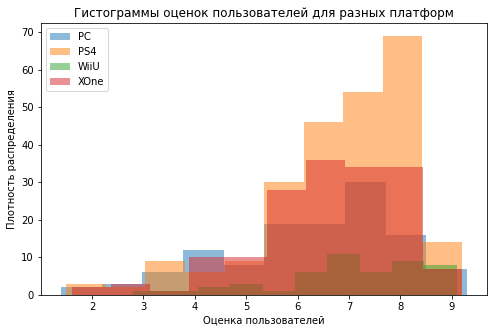

In [53]:
actual_games_data_2014.query('platform == @platform_list').groupby('platform')['user_score'].plot(kind='hist', bins=10, alpha=0.5, figsize=(8, 5), legend=True);
plt.title('Гистограммы оценок пользователей для разных платформ', fontsize=12)
plt.xlabel('Оценка пользователей')
plt.ylabel('Плотность распределения')
plt.show()

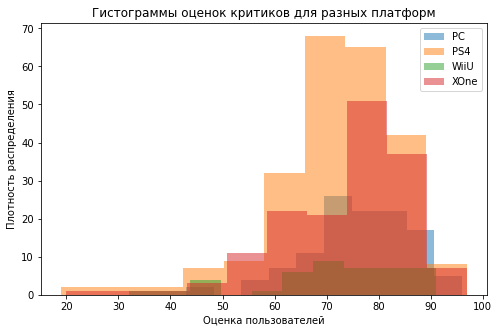

In [54]:
actual_games_data_2014.query('platform == @platform_list').groupby('platform')['critic_score'].plot(kind='hist', alpha=0.5, figsize=(8, 5), legend=True);
plt.title('Гистограммы оценок критиков для разных платформ', fontsize=12)
plt.xlabel('Оценка пользователей')
plt.ylabel('Плотность распределения')
plt.show()

И средние, и медианы у критиков выше, чем у пользователей, а распределение - уже. Можно сказать, что критики более согласованы в своих оценках, а пользователи - более критичны, они ставят больше "плохих" оценок и меньше самых высоких. Интересно, что у WiiU самые высокие оценки пользователей и самые низкие - критиков. </br>
В целом и общем нельзя сказать, что оценки пользователей и критиков сильно коррелируют с продажами этих игр, поэтому данный параметр может служить только как дополнительный при выборе ассортимента.

**Влияние оценок пользователей и критиков на продажи - вывод:**

Несмотря на то, что средние оценки пользователей и критиков для разных платформ очень близки, корреляция с продажами прослеживается в основном для оценок критиков (положительная). Корреляция продаж с оценками пользователей очень низкая для большинства платформ, за исключением WiiU.</br>
В целом, опираться на оценки критиков и пользователей при планировании ассортимента на будущий год стоит только в качестве дополнительной информации.

### Обзор жанров, продажи по жанрам

Посмотрим, какие жанры наиболее популярны у пользователей и как они соотносятся с платформами и продажами

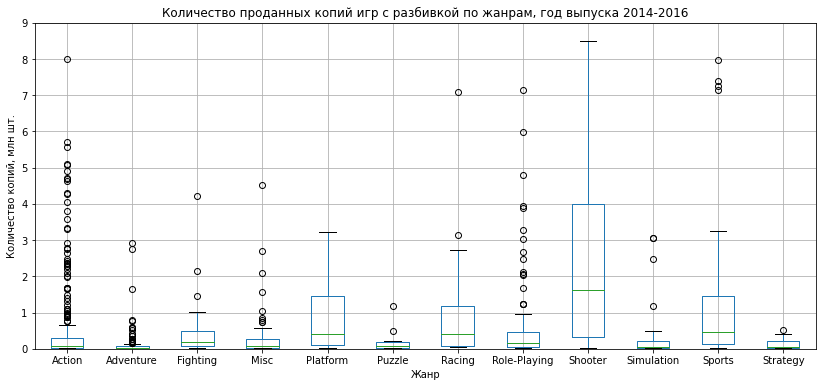

In [56]:
#для начала построим боксплоты для распредения по жанрам
actual_games_data_2014.pivot_table(index='name', columns='genre', values='total_sales', aggfunc='sum').boxplot(figsize=(14, 6));
plt.ylim(0, 9);
plt.title('Количество проданных копий игр с разбивкой по жанрам, год выпуска 2014-2016', fontsize=12)
plt.xlabel('Жанр')
plt.ylabel('Количество копий, млн шт.')
plt.show()

На ящике с усами видим, что самые большие продажи - у игр в жанре Shooter, а больше всего "выбросов" - то есть "выстреливших" игр - в жанре Action и Role-Playing.

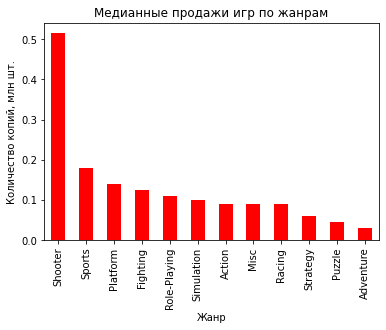

In [57]:
#выведем рейтинг жанров по "медианной" продаже

actual_games_data_2014.groupby('genre')['total_sales'].median().sort_values(ascending=False).plot(kind='bar', color='Red');
plt.title('Медианные продажи игр по жанрам', fontsize=12)
plt.xlabel('Жанр')
plt.ylabel('Количество копий, млн шт.')
plt.show()

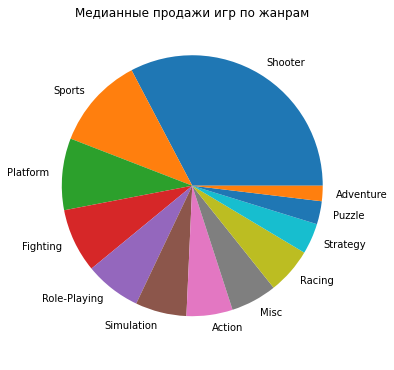

In [58]:
actual_games_data_2014.groupby('genre')['total_sales'].median().sort_values(ascending=False).plot(kind='pie', figsize=(6, 6));
plt.title('Медианные продажи игр по жанрам', fontsize=12)
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

Выведем рейтинг жанров по количеству проданных копий:

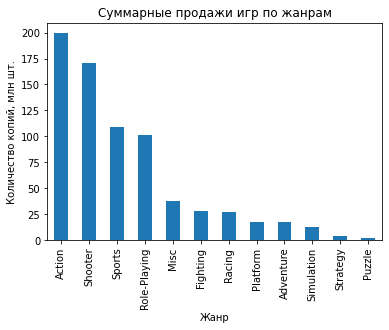

In [59]:
actual_games_data_2014.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar');
plt.title('Суммарные продажи игр по жанрам', fontsize=12)
plt.xlabel('Жанр')
plt.ylabel('Количество копий, млн шт.')
plt.show()

Рейтинг жанров по количеству игр:

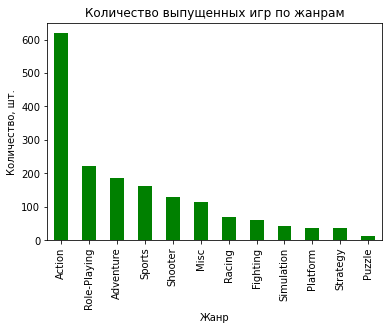

In [61]:
actual_games_data_2014.groupby('genre')['name'].count().sort_values(ascending=False).plot(kind='bar', color='Green');
plt.title('Количество выпущенных игр по жанрам', fontsize=12)
plt.xlabel('Жанр')
plt.ylabel('Количество, шт.')
plt.show()

Больше всего игр за последние 3 года было выпущено в жанре экшн и именно на этот жанр приходится самое большое количество суммарно проданных копий. Однако если заглянуть "внутрь", будет видно, что среднестатистическая экшн-игра имеет довольно низкие продажи - а общее количество проданных копий достигается за счёт нескольких десятков "звезд". </br>
По медианным продажам лидируют шутеры, спортивные и платформенные игры (при том, что тех, других и третьих было выпущено не так много), затем файтинги и ролевые игры. </br>
</br>
Таким образом, топ-5 жанров:
- Shooter
- Sports
- Platform
- Fighting
- Role-Playing

Жанр Action интересен в ассортименте с точки зрения уже состоявшихся хитов.

In [62]:
genre_list = ['Shooter', 'Sports', 'Platform', 'Fighting', 'Role-Playing']

Выведем медианные продажи игр с разбивкой по основным жарнам и платформам за последние три года:

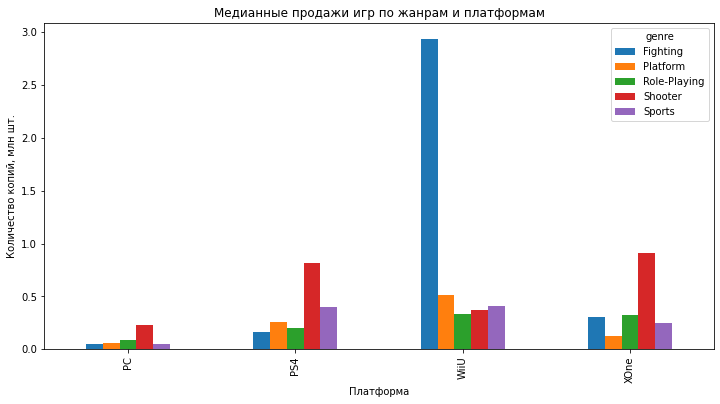

In [63]:
(
    actual_games_data_2014
    .query('genre in @genre_list and platform in @platform_list')
    .pivot_table(index='platform', columns='genre', values='total_sales', aggfunc='median').plot(kind='bar', figsize=(12, 6))
);

plt.title('Медианные продажи игр по жанрам и платформам', fontsize=12)
plt.xlabel('Платформа')
plt.ylabel('Количество копий, млн шт.')
plt.show()

А также суммарные продажи с разбивкой по жанрам и платформам за последние 3 года:

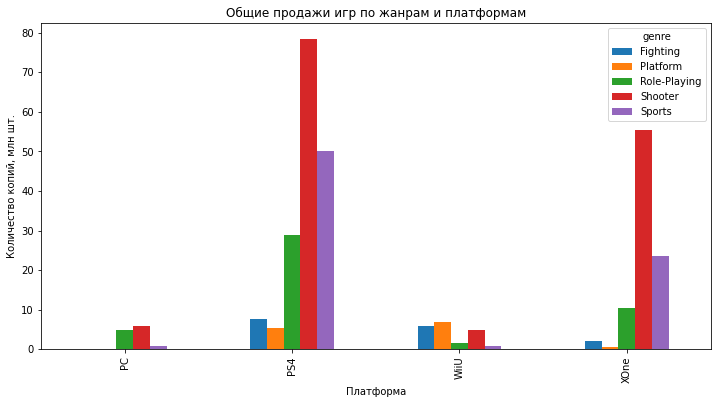

In [64]:
(
    actual_games_data_2014
    .query('genre in @genre_list and platform in @platform_list')
    .pivot_table(index='platform', columns='genre', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(12, 6))
);

plt.title('Общие продажи игр по жанрам и платформам', fontsize=12)
plt.xlabel('Платформа')
plt.ylabel('Количество копий, млн шт.')
plt.show()

In [65]:
genre_platform_rating = (
    actual_games_data_2014
    .query('genre in @genre_list and platform in @platform_list')
    .pivot_table(index='genre', columns='platform', values='total_sales', aggfunc='median')
)

for element in platform_list:
    print('Лучшие медианные продажи для платформы', element)
    print(*genre_platform_rating[element].sort_values(ascending=False).index[:4].to_list(), sep='\n')
    print('-----------------------')

Лучшие медианные продажи для платформы PS4
Shooter
Sports
Platform
Role-Playing
-----------------------
Лучшие медианные продажи для платформы XOne
Shooter
Role-Playing
Fighting
Sports
-----------------------
Лучшие медианные продажи для платформы WiiU
Fighting
Platform
Sports
Shooter
-----------------------
Лучшие медианные продажи для платформы PC
Shooter
Role-Playing
Platform
Fighting
-----------------------


**Обзор жанров - вывод:**</br>
Топ-5 жанров по медианным продажам за последние 3 года: 
- Shooter
- Sports
- Platform
- Fighting
- Role-Playing

По медианным продажам абсолютный лидер - игры Fighting на платформе WiiU. Правда здесь стоит помнить, что по суммарным продажам эта платформа далеко позади PS4 и XOne. Среди игр, вышедших за последние три года на PS4, лучше всего продаются шутеры, спорт-игры и платформы, а на XOne - шутеры, ролевые игры и имитации боёв. Вероятно, здесь стоит порекомендовать продвигать игры в топ-5 жанров для растущих платформ и при этом иметь в ассортименте свежие топы продаж по каждому из этих жанров, как наиболее массово продаваемые (а также по жанру Action).

### Портрет пользователей по регионам

Рассмотрим, как меняются продажи по жанрам и платформам в зависимости от региона - Северная Америка, Европа, Япония. Составим рейтинг топ-5 платформ и топ-5 жанров для каждого из них.

Топ-5 самых популярных платформ для: Северная Америка


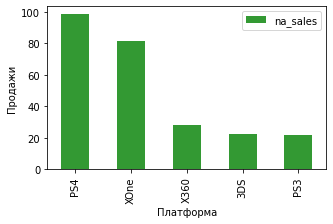

Топ-5 самых популярных платформ для: Европа


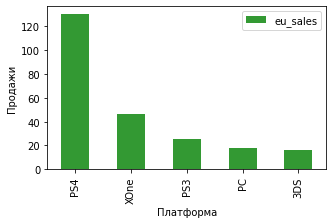

Топ-5 самых популярных платформ для: Япония


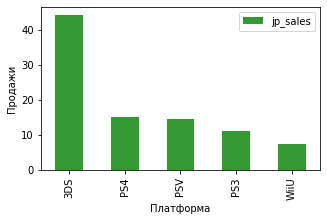

In [67]:
#выведем на экран топ-5 платформ для каждого из регионов
regions_dict = {'na_sales': 'Северная Америка', 'eu_sales': 'Европа', 'jp_sales': 'Япония'}

for element in ['na_sales', 'eu_sales', 'jp_sales']:
    (
        actual_games_data_2014
        .groupby('platform')
        .agg({element: 'sum'})
        .sort_values(by=element, ascending=False)
        .head(5)
        .plot(kind='bar', color='Green', alpha=0.8, figsize=(5, 3))
    );
    print ('Топ-5 самых популярных платформ для:', regions_dict[element])
    plt.xlabel('Платформа')
    plt.ylabel('Продажи')
    plt.show()
    


По количеству проданных за последние три года игр в Северной Америке лидирует PS4 И XOne, затем идут X360, 3DS и PS3. </br>
В Европе однозначным лидером можно назвать PlayStation - PS4 лидирует в продажах, а PS3 - на третьем месте по продажам несмотря на выход платформы-переемницы. Между ними, на втором, XOne, на четвертом - PC и затем 3DS.</br>
Картина в Японии отличается - здесь лидирует Nintendo (3DS), затем идёт PlayStation (PS4, PSV и PS3) и на последнем месте WiiU (XOne даже нет в топе). 

Топ-5 самых популярных жанров для: Северная Америка


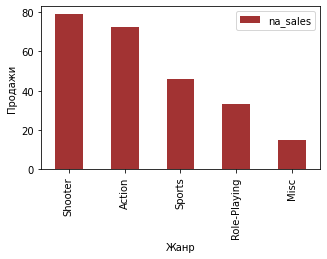

Топ-5 самых популярных жанров для: Европа


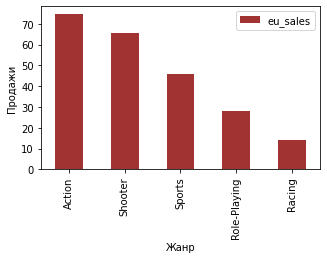

Топ-5 самых популярных жанров для: Япония


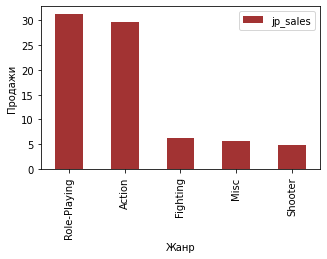

In [68]:
#выведем на экран топ-5 по жанрам в каждом регионе

for element in ['na_sales', 'eu_sales', 'jp_sales']:
    (
        actual_games_data_2014
        .groupby('genre')
        .agg({element: 'sum'})
        .sort_values(by=element, ascending=False)
        .head(5)
        .plot(kind='bar', color='DarkRed', alpha=0.8, figsize=(5, 3))
    );
    
    print ('Топ-5 самых популярных жанров для:', regions_dict[element])
    plt.xlabel('Жанр')
    plt.ylabel('Продажи')
    plt.show()

Несмотря на различие в предпочтениях по платформам, Северная Америка и Европа оказались близки в выборе игровых жанров. В Северной Америке чаще всего пользователи покупают шутеры и экшн. А в Европе - экшн и шутеры. Дальше идут спорт и ролевые игры, а на пятом месте с Америке - аркады, в Европе - гонки. </br>
В Японии - ожидаемо - всё не так. На первом месте Role-Playing, экшн только на втором. Далее идут бои, аркады и шутеры.

Создадим портрет типичного пользователя по регионам - объединим платформы и жанры и выделим топ-5 сочетаний.

Топ-5 самых популярных платформ/жанров для: Северная Америка


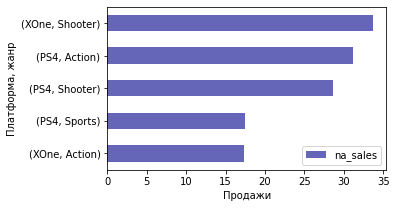

Топ-5 самых популярных платформ/жанров для: Европа


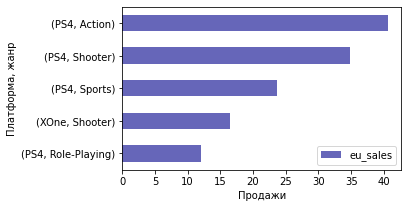

Топ-5 самых популярных платформ/жанров для: Япония


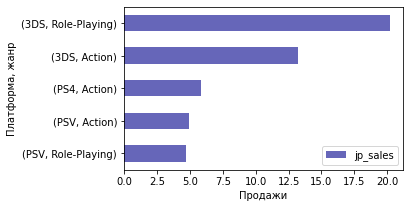

In [70]:
for element in ['na_sales', 'eu_sales', 'jp_sales']:
    
    nearest_period = (
        actual_games_data_2014
        .groupby(['platform', 'genre'])
        .agg({element: 'sum'})
        .sort_values(by=element, ascending=False)
        .head(5)
    );
    
    nearest_period.sort_values(by=element).plot(kind='barh', color='DarkBlue', alpha=0.6, figsize=(5, 3))
    print ('Топ-5 самых популярных платформ/жанров для:', regions_dict[element])
    plt.xlabel('Продажи')
    plt.ylabel('Платформа, жанр')
    plt.show()

**Выводы: портрет пользователя**</br>
</br>
**Северная Америка:** пользователи этого региона любят играть в шутеры и экшн платформе XBox. Также заметным успехом пользуются экшн игры, шутеры и спорт-игры для PlayStation.</br>
**Европа:** европейцы отдают предпочтение PlayStation - в рейтинге предпочтений лидирует PS4 с экшн и шутерами, спортом и ролевыми играми. XOne попал в топ-5 лишь на четвертой строке с шутерами. </br>
**Япония:** Японцы определенно Нинтендо - продажи ролевых и экшн игр для 3DS лидируют. Также пользуются успехом экшн для PlayStation, РПГ и экшн для портативной PSV.</br>

Посмотрим, как зависят продажи в регионе от возрастного рейтинга. 
Из рассмотрения исключим значение RP ('rating pending') - оно присваивается игре при выходе и позже заменяется на возрастной.
Значение 'undefined' - это обработанные ранее пропуски.

Возрастной рейтинг для: Северная Америка


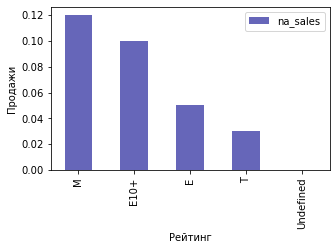

Возрастной рейтинг для: Европа


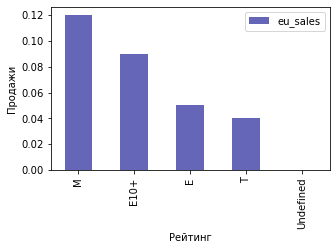

Возрастной рейтинг для: Япония


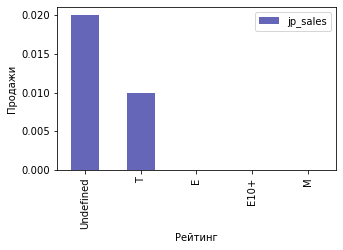

In [71]:
for element in ['na_sales', 'eu_sales', 'jp_sales']:
    raiting = (
    actual_games_data_2014
    .query('rating not in "RP" ')
    .groupby('rating')
    .agg({element: 'median'})
    .sort_values(by=element, ascending=False)
    
    );
    
    raiting.plot(kind='bar', color='DarkBlue', alpha=0.6, figsize=(5, 3))
    print ('Возрастной рейтинг для:', regions_dict[element])
    plt.xlabel('Рейтинг')
    plt.ylabel('Продажи')
    plt.show()
    

**Вывод: возрастной рейтинг** </br>
Наибольшей популярностью в СА и Европе пользуются игры с рейтингом М - т.е. для взрослых игроков от 17 лет. Затем идут E - Everyone, предназначенные для детей от 6 лет и взрослых. Чуть меньшей популярностью пользуются игры E10+ и T - для детей страше 10 и для подростков. </br>
В Японии на первом месте игры категории Undefined, т.е. те, для которых рейтинг не определен в нашем исследовании. На втором - игры для подростков. Затем идут категории E, M и  E10+ - их медианные продажи совсем низкие.</br>
Такое различие объясняется тем, что ESRB - западная система и оценивает в основном игры для западного рынка. В Японии система возрастного рейтинга - другая и, вероятно, под рейтингом undefined находятся игры для японского и других рынков Азии.

### Проверяем гипотезы

Рассмотрим пользовательские рейтинги по различным платформам и жанрам.

In [88]:
#выведем средние пользовательские оценки по всем платформам

actual_games_data_2014.groupby('platform')['user_score'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,55.0,7.138182,1.503513,2.4,6.500,7.40,8.200,9.0
PC,122.0,6.298361,1.703278,1.4,5.325,6.80,7.600,9.3
PS3,98.0,6.014286,1.853222,0.2,4.525,6.55,7.400,8.6
PS4,242.0,6.828099,1.399035,1.5,6.200,7.10,7.875,9.2
PSP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PSV,73.0,7.656164,1.103402,2.5,7.300,7.80,8.400,9.3
Wii,2.0,6.350000,2.899138,4.3,5.325,6.35,7.375,8.4
WiiU,48.0,7.087500,1.423754,2.8,6.500,7.10,8.225,9.1
X360,83.0,5.771084,1.709623,0.7,4.500,6.00,7.200,8.7


**Различаются ли средние пользовательские рейтинги платформ XOne и PC?**</br>
Средняя оценка платформы XOne - 6.59, а платформы PC - 6.29. Они кажутся очень близкими.</br>
У нас есть две выборки из генеральной совокупности - оценки пользователей одной платформы и другой. Они не взаимосвязаны между собой, значит выборки можно считать независимыми. Выборки разного размера, поэтому при проверке гипотезы будем считать дисперсии отдельно.</br>
</br>
**Нулевая гипотеза:** средний пользовательский рейтинг платформы XOne равен среднему пользовательскому рейтингу платформы PC.</br>
**Альтернативная гипотеза:** пользовательские рейтинги XOne и PC статистически различны.</br>
Выберем уровень значимости 0.001. Уровень значимости показывает максимальную вероятность случайного получения такого результата. Мы используем достаточно большую выборку, а значит вероятность случайных искажений в ней мала и нулевую гипотезу мы можем отвергнуть только при очень низком уровне значимости.

In [89]:
#определим функцию, которая будет принимать на вход p-value и уровень значимости, сравнивать их и отвергать/нет нулевую гипотезу

def verdict(pvalue, alpha):
    print('pvalue = ', pvalue, ';', 'alpha =', alpha)
    if pvalue < alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

In [90]:
#определим две выборки по платформам XOne и PC
XOne_games = actual_games_data_2014.query('platform == "XOne" ')['user_score'].dropna()
PC_games = actual_games_data_2014.query('platform == "PC" ')['user_score'].dropna()

#print(len(XOne_games), len(PC_games))
#определим уровень значимости
alpha = 0.001

#проверим гипотезу t-критерием Стьюдента
results = st.ttest_ind(XOne_games, PC_games, equal_var=False)
verdict(results.pvalue, alpha)

pvalue =  0.11601398086668832 ; alpha = 0.001
Не получилось отвергнуть нулевую гипотезу


**Нулевую гипотезу отвергнуть не получилось - имеющиеся данные не позволяют сделать вывод о том, что средние рейтинги XOne и PC различаются статистически значимо.**

In [91]:
#выведем средние пользовательские рейтинги по платформам

actual_games_data_2014.groupby('genre')['user_score'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,297.0,6.760606,1.377852,2.0,6.100,7.10,7.700,9.0
Adventure,47.0,7.470213,1.253329,2.9,7.000,7.50,8.400,9.3
Fighting,37.0,6.983784,1.348356,2.9,6.300,7.40,7.800,8.7
Misc,41.0,6.968293,1.260047,4.1,6.200,7.00,8.000,8.7
Platform,29.0,6.741379,1.789556,3.4,5.100,7.20,8.300,8.9
Puzzle,4.0,7.975000,0.613052,7.4,7.475,7.95,8.450,8.6
Racing,51.0,6.327451,1.590104,1.6,5.200,6.40,7.700,9.1
Role-Playing,105.0,7.348571,1.317567,1.4,6.900,7.60,8.200,9.3
Shooter,108.0,6.549074,1.382027,3.0,5.775,6.85,7.700,8.5


**Различаются ли средние пользовательские рейтинги жанров Action и Sports?**</br>
Средняя оценка Action - 6.76, а жанра Sports - всего 5.22. Проверим, различаются ли они статистически. </br>
У нас есть две выборки из генеральной совокупности - оценки пользователей одной платформы и другой. Они не взаимосвязаны между собой, значит выборки можно считать независимыми. Выборки разного размера, поэтому при проверке гипотезы будем считать дисперсии отдельно.</br>
</br>
**Нулевая гипотеза:** средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports.</br>
**Альтернативная гипотеза:** пользовательские рейтинги Action и Sports статистически различны.</br>
Выберем уровень значимости 0.001. Уровень значимости показывает максимальную вероятность случайного получения такого результата. Мы используем достаточно большую выборку, а значит вероятность случайных искажений в ней мала и нулевую гипотезу мы можем отвергнуть только при очень низком уровне значимости.

In [92]:
#определим две выборки по жанрам Action и Shooter
Action_games = actual_games_data_2014.query('genre == "Action" ')['user_score'].dropna()
Shooter_games = actual_games_data_2014.query('genre == "Sports" ')['user_score'].dropna()

#print(len(Action_games), len(Shooter_games))
#определим уровень значимости
alpha = 0.001

#проверим гипотезу t-критерием Стьюдента
results = st.ttest_ind(Action_games, Shooter_games, equal_var=False)
verdict(results.pvalue, alpha)

pvalue =  1.1825550382644557e-14 ; alpha = 0.001
Отвергаем нулевую гипотезу


**Нулевую гипотезу отвергнуть получилось - данные, полученные в рассмотренной выборке, говорят о том, что средние рейтинги Action и Sports различаются статистически значимо.**

## Общий вывод

Рассмотрена подборка данных о компьютерных играх, выпущенных с 1980 по 2016 год, подробно проанализирован период с 2014 по 2016 гг. Проведён анализ платформ, жанров, рейтингов пользователей и критиков, составлены портреты актуальные пользователей по регионам Северной Америки, Европы и Японии и даны рекомендации по формированию ассортимента игр с учетом проведённого анализа.
- число выпускаемых игр росло в течение 28 лет, бум релизов пришёлся на 2008-2009 годы; с тех пор тренд идет вниз
- средний срок жизни игровой платформы - когда для неё выпускаются новые игры - составляет около 11 лет с пиком роста на 5-6 год существования платформы
- наиболее актуальные на текущий момент платформы - PS4, XOne и WiiU, при этом PS4 и XOne находятся на подъеме, а WiiU начинает падать
- в данных о PC не учтены поколения компьютерных комплектующих, поэтому ПК - единственная платформа без жизненного цикла, актуальная всегда
- продажи основной массы игр на каждой платформе не превышают 2-3 млн. копий, однако у каждой из них есть "герои" с продажами в 5-10 раз больше основной массы
- в исследовании был сформирован топ-10 игр для актуальных на данный момент платформ + PC
- пользовательские оценки фактически никак не коррелируют с уровнем продаж, исключение составляет платформа WiiU
- есть слабоположительная корреляция между оценками критиков и уровнем продаж
- наиболее популярные жанры игр - Shooter, Sport, Platform, Fighting и Role-Playing
- пользователи Северной Америки предпочитают шутеры и экшн-игры на XBox, а пользователи Европы - экшн и шутеры на PlayStation
- игроки из Японии отдают предпочтение ролевым и экшн-играм на платформе 3DS, а также играм на портативных PlayStation
- наибольшей популярностью в СА и Европе пользуются игры с ESRB-рейтингом M и игры без рейтинга. В Японии - игры без рейтинга и с ESRB-рейтингом Т.
- средние пользовательские рейтинги игр, представленные в данной выборке, не различаются статистически значимо для платформ XOne и PC 
- средние пользовательские представленные в данной выборке, статистически значимо различаются для жанров Action и Sports